> **DO NOT EDIT IF INSIDE tsds folder**


# Week 2: Artificial Neural Networks 1

*Wednesday, February 12, 2019*

Today, you will be tinkering with a pure-python feed forward neural network.
- Part 2.1: Tinker with some visuals
- Part 2.2: Train a pure-Python neural network

**Questions**: Outside of class, use [issue](https://github.com/abjer/tsds/issues) on GitHub for asking questions.

In [2]:
%matplotlib inline

import numpy as np
import random
import matplotlib.pylab as plt
from scipy.interpolate import interp1d

## Exercises

### Part 2.1: Tinker with some visuals

Before we dive in to the code, it's really important that our intuition about what neural networks are doing is as good as possible. And the best (and most fun) way to do that is to play around and with things a bit, so go familiarize yourself with the [Tensorflow Playground](https://playground.tensorflow.org/), slide some knobs and pull some levers.

> **Ex. 2.1.1** Using [the dataset](https://playground.tensorflow.org/#activation=sigmoid&batchSize=10&dataset=gauss&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.42272&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false) with the two well-seperate guassian distributions, create the minimal neural network that seperates the clusters. You can report your answer with a link (the URL on playground.tensorflow.org changes as you update the network, so at any time you can use the link to show others what you have created).

> **Ex. 2.1.2** Using [the dataset](https://playground.tensorflow.org/#activation=sigmoid&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.16631&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false) with the hard-to-seperate circles, create the minimal neural network that seperates the clusters. Again, report your answer with a link.

> **Ex. 2.1.3** See if you can create a network that performs well on the [the dataset](https://playground.tensorflow.org/#activation=sigmoid&batchSize=10&dataset=spiral&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.08961&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false) with the intertwined spirals. If possible, include in your answer not only the link but also a screenshot of the scatter plot.

### Part 2.2: A pure-Python neural network

Now, let's inspect Michael Nielsen's neural network. He ends the first chapter of his book by implementing all the stuff he went through, and below I've synthesized this code into a single working example, with some minor readibility edits and updates so it works in Python 3.

In [3]:
# Miscellaneous functions
def sigmoid(z):
    """The sigmoid function."""
    return 1 / (1 + np.exp(-z))

def sigmoid_prime(z):
    """Derivative of the sigmoid function."""
    return sigmoid(z) * (1 - sigmoid(z))

def step(z, threshold=0.5):
    if z > threshold:
        return 1
    return 0

# Feed forward neural network class
class Network(object):

    def __init__(self, sizes):
        """The list ``sizes`` contains the number of neurons in the
        respective layers of the network.  For example, if the list
        was [2, 3, 1] then it would be a three-layer network, with the
        first layer containing 2 neurons, the second layer 3 neurons,
        and the third layer 1 neuron.  The biases and weights for the
        network are initialized randomly, using a Gaussian
        distribution with mean 0, and variance 1.  Note that the first
        layer is assumed to be an input layer, and by convention we
        won't set any biases for those neurons, since biases are only
        ever used in computing the outputs from later layers."""
        
        self.num_layers = len(sizes)
        self.sizes = sizes
        
        # Q: Print these out, explain their contents. You can instantiate a network by
        # doing `net = Network([2, 3, 1])`, and then printing `net.biases`.
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x) for x, y in zip(sizes[:-1], sizes[1:])]

    def feedforward(self, a):
        """Return the output of the network if ``a`` is input."""
        
        # Q: What is `a`? How many iterations will this loop run? For a `sizes=[2, 3, 1]`
        # network, what is the shape of `a` at each iteration?
        for b, w in zip(self.biases, self.weights):
            a = sigmoid(np.dot(w, a) + b)
        return a

    def SGD(self, training_data, epochs, mini_batch_size, eta, test_data=None, silent=False):
        """Train the neural network using mini-batch stochastic
        gradient descent.  The ``training_data`` is a list of tuples
        ``(x, y)`` representing the training inputs and the desired
        outputs.  The other non-optional parameters are
        self-explanatory.  If ``test_data`` is provided then the
        network will be evaluated against the test data after each
        epoch, and partial progress printed out.  This is useful for
        tracking progress, but slows things down substantially."""
        
        n = len(training_data)
        if test_data:
            n_test = len(test_data)
        
        for j in range(epochs):
            
            # Q: What happens here? Why do we shuffle the training data? Explain the
            # contents of `mini_batches`.
            random.shuffle(training_data)
            mini_batches = [
                training_data[k:k+mini_batch_size]
                for k in range(0, n, mini_batch_size)
            ]
            
            # Q: And what does this step do?
            for mini_batch in mini_batches:
                self.update_mini_batch(mini_batch, eta)
            
            if not silent:
                if test_data:
                    print("Epoch {0}: {1} / {2}".format(j, self.evaluate(test_data), n_test))
                else:
                    print("Epoch {0} complete".format(j))

    def update_mini_batch(self, mini_batch, eta):
        """Update the network's weights and biases by applying
        gradient descent using backpropagation to a single mini batch.
        The ``mini_batch`` is a list of tuples ``(x, y)``, and ``eta``
        is the learning rate."""
        
        # A: These two vectors correspond to -∇C(W) (and -∇C(b))
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        
        # Q: But what happens here? Explain, in particular, how we update `nabla_b` and `nabla_w`
        for x, y in mini_batch:
            delta_nabla_b, delta_nabla_w = self.backprop(x, y)
            nabla_b = [nb+dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
            nabla_w = [nw+dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
            
        # Q: Now we have our gradient vectors, `nabla_b` and `nabla_w`. Explain how we use them
        # to update the weights and biases
        self.weights = [
            w - eta / len(mini_batch) * nw
            for w, nw in zip(self.weights, nabla_w)
        ]
        self.biases = [
            b - eta / len(mini_batch) * nb
            for b, nb in zip(self.biases, nabla_b)
        ]

    def backprop(self, x, y):
        """Return a tuple ``(nabla_b, nabla_w)`` representing the
        gradient for the cost function C_x.  ``nabla_b`` and
        ``nabla_w`` are layer-by-layer lists of numpy arrays, similar
        to ``self.biases`` and ``self.weights``."""
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        
        # feedforward
        activation = x
        activations = [x] # list to store all the activations, layer by layer
        zs = [] # list to store all the z vectors, layer by layer
        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, activation)+b
            zs.append(z)
            activation = sigmoid(z)
            activations.append(activation)
        
        # backward pass
        delta = self.cost_derivative(activations[-1], y) * sigmoid_prime(zs[-1])
        nabla_b[-1] = delta
        nabla_w[-1] = np.dot(delta, activations[-2].transpose())
        
        # Note that the variable l in the loop below is used a little
        # differently to the notation in Chapter 2 of the book. Here,
        # l = 1 means the last layer of neurons, l = 2 is the
        # second-last layer, and so on. It's a renumbering of the
        # scheme in the book, used here to take advantage of the fact
        # that Python can use negative indices in lists.
        for l in range(2, self.num_layers):
            z = zs[-l]
            sp = sigmoid_prime(z)
            delta = np.dot(self.weights[-l+1].transpose(), delta) * sp
            nabla_b[-l] = delta
            nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())
        return nabla_b, nabla_w

    def evaluate(self, test_data):
        """Return the number of test inputs for which the neural
        network outputs the correct result. Note that the neural
        network's output is assumed to be the index of whichever
        neuron in the final layer has the highest activation."""
        if self.sizes[-1] == 1:
            test_results = [
                (step(self.feedforward(x)), y)
                for x, y in test_data
            ]
        else:
            test_results = [
                (np.argmax(self.feedforward(x)), y)
                for x, y in test_data
            ]
        return sum(int(y_pred == y) for (y_pred, y) in test_results)

    def cost_derivative(self, output_activations, y):
        """Return the vector of partial derivatives \partial C_x /
        \partial a for the output activations."""
        return output_activations - y

> **Ex. 2.2.1** I want you to inspect the code so you understand what (most of) it is doing. I've inserted a number of questions as comments in the code and each one starts like `"# Q: "`. You should now (starting from the top), write (or code) down the answer to each one of them.
>
> *Hint*: You need to closely follow the code. You can verify that your idea of what a variable contains is correct, if you print it. Simply create an instance of the network and you will be able to access the variables of that instance to see what they look like.

In [18]:
# Q: Print these out, explain their contents. You can instantiate a network by
# doing `net = Network([2, 3, 1])`, and then printing `net.biases`.

net = Network([2, 3, 1])
net.biases

[array([[-0.43885923],
        [-1.95656878],
        [ 0.77117281]]), array([[-2.10340546]])]

So it's a list with two arrays, basically. The first array has shape 3 x 1 and the second has shape 1 x 1. Note that they both have just one column. These are the **bias vectors** for each of the two layers. If we had had three layers, there would be three such bias vectors.

In [19]:
net.weights

[array([[-2.75142953,  0.05729418],
        [ 0.33136031,  0.5943197 ],
        [ 1.28536517, -0.60326497]]),
 array([[-1.81042193, -0.41611646, -1.18736476]])]

Here, we have again an array with two arrays. These are the **weight matrices** and each has the same number of rows as their corresponding bias vectors. The number of columns in each of the matrices corresponds to the number of input neurons there are to the corresponding layer. So since we define 2 input neurons, the first weight matrix has 2 columns, and as we define 3 hidden neurons, the second layer weight matrix has 3 columns.

In [ ]:
# Q: What is `a`? How many iterations will this loop run? For a `sizes=[2, 3, 1]`
# network, what is the shape of `a` at each iteration?

`a` is the intermediate values of the hidden- and output-neurons in each iteration of forward propagation.
We also saw this equation during the first lecture on ANNs.
For the current network of `sizes = [2, 3, 1]`, the for loop will run for two iterations.
In the first iterations it computes the values of the hidden neurons (a 3 x 1 array) by matrix multiplying the input with the first layer weight matrix and addind the bias vector,
and in the second iteration it computes the output value (a 1 x 1 array) in the same way.


In [20]:
# Q: What happens here? Why do we shuffle the training data? Explain the
# contents of `mini_batches`.

To make gradient descent less computationally demanding, we choose, in each training epoch,
to only evaluate the cost function and its gradient in portions of `mini_batch_size` *random* datapoints.
This randomly choosing of datapoints to use in the cost function is what turns *gradient descent* into *stochastic gradient descent*.
The way it is implemented here, each epoch trains on all the training data split randomly into `len(training_data)/mini_batch_size` *mini batches*,
thus yielding `len(training_data)/mini_batch_size * epochs` weight updates with SGD in the entire training process.

In [ ]:
# Q: And what does this step do?

Here, we loop through the mini batches of size `mini_batch_size` and do gradient descent.

In [21]:
# Q: But what happens here? Explain, in particular, how we update `nabla_b` and `nabla_w`

`nabla_b` and `nabla_w` (our gradient vectors) tells us which direction in "weight space" is uphill on the cost function, or practically, how much the cost function increases when a given weight is increased by one.
`nabla_b` and `nabla_w` are initially set to zero.
So to compute the gradient vectors for the whole mini batch, we simply compute the gradients caused by *each* individual datapoint *and add them all up*.

In [22]:
# Q: Now we have our gradient vectors, `nabla_b` and `nabla_w`. Explain how we use them
# to update the weights and biases

When we've computed the gradient vectors, we must subtract them from the weight and bias matrices.
That is what the list comprehension is doing.
Note that it divides the learning rate `eta` by the size of the mini match.
If we rearrange the math from `eta / len(mini_batch) * nw` to `eta * nw / len(mini_batch)`, we see that making
this division corresponds to computing the *average* gradients of the samples in the mini batch, rather than the
*summed* gradients.
This is a clever way of decoupling the learning rate parameter, `eta`, from the `mini_batch_size`.

#### Classifying data

Now let's use this network to classify some points. Remember the examples from my lecture with the two cluster? Below you get some code for generating data like that.

In [4]:
def generate_X_linear(N=200):

    X = np.vstack([
        np.random.normal([-2, -2], 1, size=(int(N/2), 2)),
        np.random.normal([2, 2], 1, size=(int(N/2), 2))
    ])

    y = np.array([0] * int(N/2) + [1] * int(N/2)).reshape(-1, 1)
    
    return X, y

def generate_X_nonlinear(N=200, R=5):

    X_inner = np.random.normal([0, 0], 1, size=(int(N/2), 2))

    X_outer = np.array([
        [R*np.cos(theta), R*np.sin(theta)]
        for theta in np.linspace(0, 2 * np.pi, int(N/2))
    ]) + np.random.randn(int(N/2), 2)

    X = np.vstack([X_inner, X_outer])
    y = np.array([0] * int(N/2) + [1] * int(N/2)).reshape(-1, 1)
    
    return X, y

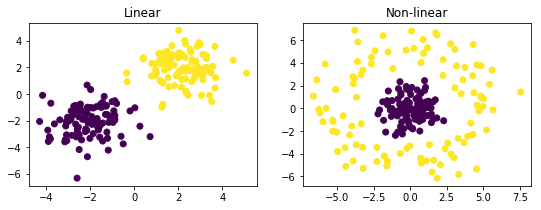

In [31]:
plt.figure(figsize=(9, 3))

X, y = generate_X_linear()
plt.subplot(1, 2, 1)
plt.title("Linear", fontsize=12)
plt.scatter(X[:, 0], X[:, 1], c=list(y.reshape(-1)))

X, y = generate_X_nonlinear()
plt.subplot(1, 2, 2)
plt.title("Non-linear", fontsize=12)
plt.scatter(X[:, 0], X[:, 1], c=list(y.reshape(-1)))

plt.show()

The data needs to be formatted a little different when we give it to Nielsen's code. Basically, it asks for (x, y) tuple pairs, so in each tuple you have a datapoint and it's label. Furthermore, both x and y must be vertical vectors (remember why?). The function below takes `X` and `y` and returns the data in this format:

In [5]:
def prepare_data(X, y):
    """Format the dataset X and y so it fits with Nielsen's code."""
    return [
        (X[i].reshape(-1, 1), y[i].reshape(-1, 1))  # our tuple (x, y)
        for i in range(len(y))
    ]

Also, for the next exercise, you may find the following function useful.

In [6]:
class cmap_in_range:
    """Create map to range of colors inside given domain.

    Example
    -------
    >>> cmap = cmap_in_range([0, 1])
    >>> cmap(0.1)
    (0.30392156862745101, 0.30315267411304353, 0.98816547208125938, 1.0)
    """
    def __init__(self, cmap_domain, cmap_range=[0, 1], cmap_style='rainbow'):
        self.cmap_domain = cmap_domain
        self.cmap_range = cmap_range
        self.m = interp1d(cmap_domain, cmap_range)
        self.cmap = plt.get_cmap(cmap_style)
        
    def __call__(self, value):
        if not self.cmap_domain[0] <= value <= self.cmap_domain[1]:
            raise Exception("Value must be inside cmap_domain.")
        return self.cmap(self.m(value))

> **Ex. 2.2.2**: Create a neural network with `sizes=[2, 1]`. This is actually just our most basic Perceptron model with two inputs and a single output. Generate 1e5 training datapoints and 1e4 testing datapoints using the `generate_X_linear` function, and fit the neural network to this data. Once you've fitted the network, make two plots of your test datapoints, one where points are colored by predictions and another where points are colored by their true labels. Can you say something about the points that are being mislabeled?
>
>*Hint*: You'll probably find some of Nielsen's examples from [Chapter 1](http://neuralnetworksanddeeplearning.com/chap1.html) in his book useful. Also, note that predictions are values between 0 and 1, not hard 0s and 1s, due to the sigmoid activation function. You can deal with this however you like when you color the points by prediction.

In [7]:
# Instantiate a one-layer neural network with 2 input neurons and 1 output neuron
net = Network([2, 1])

In [16]:
# Generate training and test data
X_train, y_train = generate_X_linear(10000)
X_test, y_test = generate_X_linear(100)

# Reformat data to expected input format
data_training = prepare_data(X_train, y_train)
data_test = prepare_data(X_test, y_test)

# Train neural network
net.SGD(
    training_data=data_training,  # We only train on the training data
    epochs=10,                    # and only do 10 gradient descent steps
    mini_batch_size=100,          # each time using 100 datapoints to evaluate the cost function
    eta=1,                        # with a learning rate of 1.
    test_data=data_test           # We provide test data to see how well it generalizes in each epoch
)

Epoch 0: 99 / 100
Epoch 1: 99 / 100
Epoch 2: 99 / 100
Epoch 3: 99 / 100
Epoch 4: 99 / 100
Epoch 5: 99 / 100
Epoch 6: 99 / 100
Epoch 7: 99 / 100
Epoch 8: 99 / 100
Epoch 9: 99 / 100


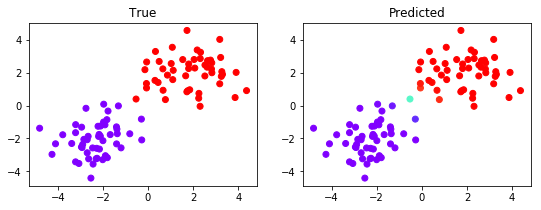

In [17]:
# This colormap function is just for plotting. You instantiate it with some interval
# like from 0 to 1 -- [0, 1] -- and then call it with a value in that interval to get
# a rgb color.
cmap = cmap_in_range([0, 1])

# Plot the predictions next to the true labels. Not that I'm using the soft predictions
# rather than hard 0s and 1s, so we can get an idea of how the decision boundary looks.
# Alternatively, we could have also just predicted values in a grid-like fashion to get
# predictions for the entire domain of the data.
plt.figure(figsize=(9, 3))

plt.subplot(1, 2, 1)
plt.title("True", fontsize=12)
plt.scatter(X_test[:, 0], X_test[:, 1], c=[cmap(v) for v in y_test.reshape(-1)])

plt.subplot(1, 2, 2)
plt.title("Predicted", fontsize=12)
plt.scatter(X_test[:, 0], X_test[:, 1], color=[cmap(net.feedforward(x)[0][0]) for x in X_test])
plt.show()

**To comment** on the mislabeled point(s) here, it's the ones closest to the decision boundary. Looking at the true labels, you're compelled to cut the neural network some slack, since we don't want it to overfit anyway.

> **Ex. 2.2.3**: Now we want to do the same thing as in Ex. 2.2.2, but with the data generated with the `generate_X_nonlinear` function.
>
>*Hint*: Think back to the slides to figure out what `sizes` should be.

In [ ]:
# Instantiate a two-layer neural network with 2 input neurons, 3 hidden neurons and 1 output neuron.
# The comments from Ex. 2.2.2 applies to the rest of the code
net = Network([2, 3, 1])

In [222]:
X_train, y_train = generate_X_nonlinear(1000)
X_test, y_test = generate_X_nonlinear(100)

data_training = prepare_data(X_train, y_train)
data_test = prepare_data(X_test, y_test)

net.SGD(
    training_data=data_training,
    epochs=100,
    mini_batch_size=10,
    eta=0.1,               # Note that the learning rate is smaller
    test_data=data_test,
    silent=False
)

Epoch 0: 61 / 100
Epoch 1: 72 / 100
Epoch 2: 76 / 100
Epoch 3: 79 / 100
Epoch 4: 79 / 100
Epoch 5: 80 / 100
Epoch 6: 79 / 100
Epoch 7: 80 / 100
Epoch 8: 81 / 100
Epoch 9: 81 / 100
Epoch 10: 80 / 100
Epoch 11: 80 / 100
Epoch 12: 80 / 100
Epoch 13: 79 / 100
Epoch 14: 80 / 100
Epoch 15: 79 / 100
Epoch 16: 79 / 100
Epoch 17: 79 / 100
Epoch 18: 80 / 100
Epoch 19: 80 / 100
Epoch 20: 80 / 100
Epoch 21: 80 / 100
Epoch 22: 79 / 100
Epoch 23: 79 / 100
Epoch 24: 79 / 100
Epoch 25: 80 / 100
Epoch 26: 81 / 100
Epoch 27: 81 / 100
Epoch 28: 81 / 100
Epoch 29: 81 / 100
Epoch 30: 82 / 100
Epoch 31: 82 / 100
Epoch 32: 82 / 100
Epoch 33: 82 / 100
Epoch 34: 82 / 100
Epoch 35: 82 / 100
Epoch 36: 82 / 100
Epoch 37: 82 / 100
Epoch 38: 82 / 100
Epoch 39: 82 / 100
Epoch 40: 83 / 100
Epoch 41: 83 / 100
Epoch 42: 83 / 100
Epoch 43: 84 / 100
Epoch 44: 85 / 100
Epoch 45: 86 / 100
Epoch 46: 86 / 100
Epoch 47: 86 / 100
Epoch 48: 86 / 100
Epoch 49: 87 / 100
Epoch 50: 87 / 100
Epoch 51: 87 / 100
Epoch 52: 87 / 100
Epo

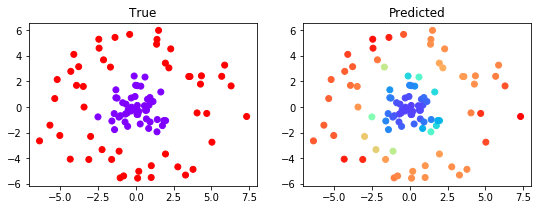

In [224]:
cmap = cmap_in_range([0, 1])

y_true = y_test.reshape(-1)
y_pred = [net.feedforward(x.reshape(-1, 1))[0][0] for x in X_test]

plt.figure(figsize=(9, 3))

plt.subplot(1, 2, 1)
plt.title("True", fontsize=12)
plt.scatter(X_test[:, 0], X_test[:, 1], color=list(map(cmap, y_true)))

plt.subplot(1, 2, 2)
plt.title("Predicted", fontsize=12)
plt.scatter(X_test[:, 0], X_test[:, 1], color=list(map(cmap, y_pred)))
plt.show()

**To comment** on the predictions, again we see that most misclassifications happen when points lie close to the decision boundary. **Note** I reran the optimization a couple times before I got good predictions.

#### Classifying digits

Let's track Nielsen's footsteps a bit further and implement his digit classification example. I've put the MNIST dataset into this week's material on Github, so you should be able to import the `mnist_loader` module and load data like:

In [2]:
import mnist_loader
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()

The data is formatted to work with Nielsen's code. But just for fun, let's try to visualize on the datapoints. Originally, digits are repreented as 28 x 28 matrices, but here we just represent them as 784-dimensional arrays. However, we can easily reshape them back and look at them as images:

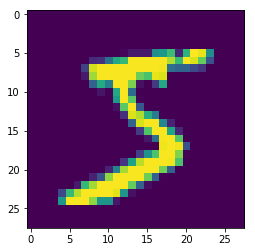

In [6]:
plt.imshow(training_data[0][0].reshape(28, 28))
plt.show()

> **Ex. 2.2.4**: Now, fit a model with a suiting architecture (i.e. `sizes`) to `training_data`, and report your accuracy on the `validation_data`.

> **Ex. 2.2.4**: Assuming you could get a "pretty" high accuracy in Ex. 2.2.4, Visualize 10 examples that get misclassified. comment on what you see.